In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/force2020_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [ ]:
data.isna().sum()/len(data)*100

,0
RHOB,0.000000
GR,0.000000
DEPTH_MD,0.000000
NPHI,23.196497
PEF,10.016420
DTC,0.443350


In [ ]:
freqgrph=data[['RHOB','NPHI','DTC']]

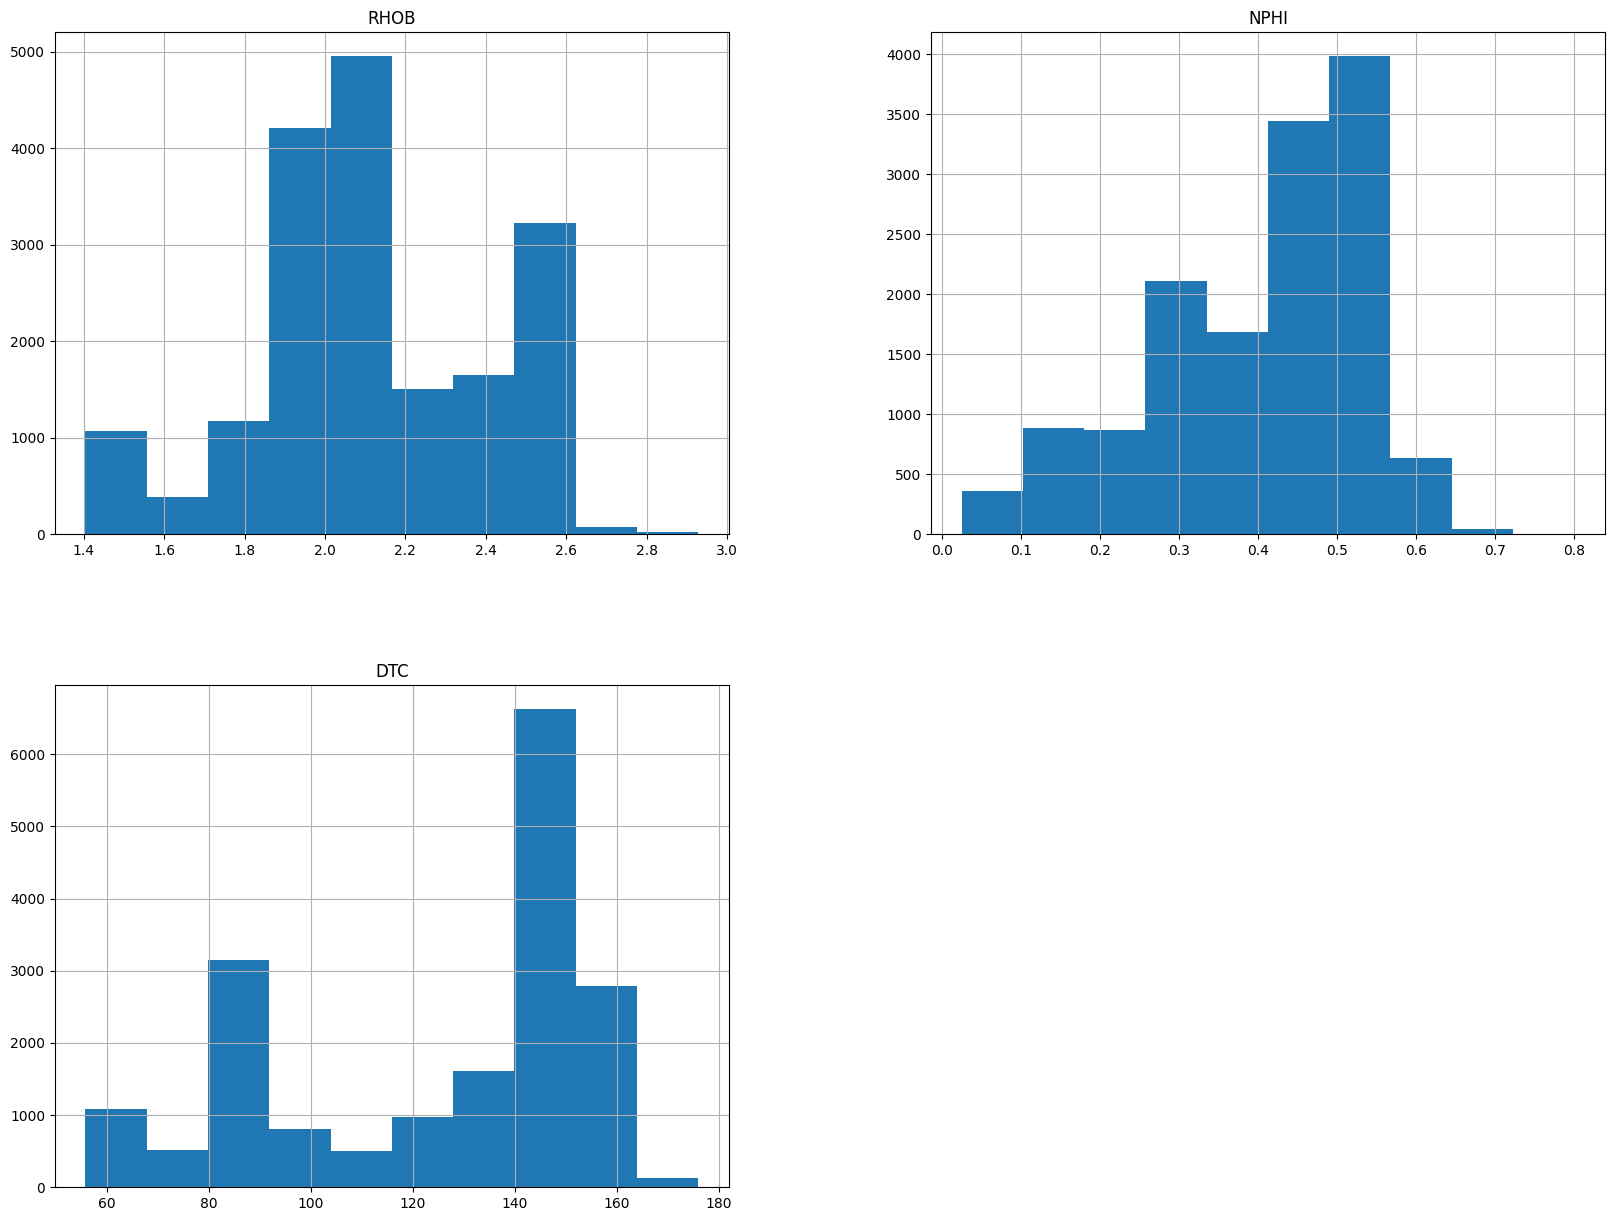

In [ ]:
freqgrph.hist(figsize=(20,15))
plt.show()

In [ ]:
for col in ['PEF', 'NPHI','DTC']:
       data[col]=data[col].fillna(data[col].median())

In [ ]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.DataFrame({
    'RHOB': data['RHOB'],
    'GR': data['GR'],
    'DEPTH_MD': data['DEPTH_MD'],
    'NPHI': data['NPHI'],
    'PEF': data['PEF'],
    'DTC': data['DTC']
})

In [ ]:
data.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

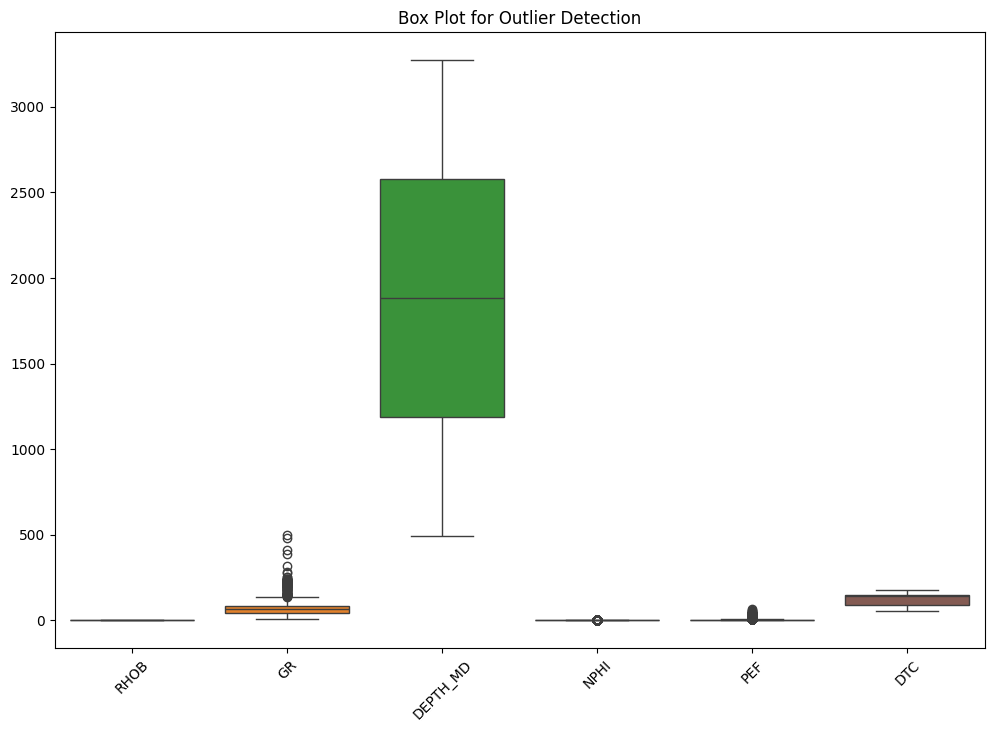

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Standard Scaling

In [ ]:
cols_to_scale = ['RHOB', 'NPHI']
data_to_scale = data[cols_to_scale]
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the selected columns
scaled_data = scaler.fit_transform(data_to_scale)
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=data.index)
# Replace the original columns with scaled data
data[cols_to_scale] = scaled_df
print(data)

           RHOB         GR  DEPTH_MD      NPHI        PEF         DTC
0     -0.759999  80.200851   494.528  0.285088  20.915468  161.131180
1     -0.741163  79.262886   494.680  0.285088  19.383013  160.603470
2     -0.718560  74.821999   494.832  0.285088  22.591518  160.173615
3     -0.734045  72.878922   494.984  0.285088  32.191910  160.149429
4     -0.773944  71.729141   495.136  0.285088  38.495632  160.128342
...         ...        ...       ...       ...        ...         ...
18265  1.745819  19.418915  3271.416 -1.915360   2.790249  141.300461
18266  1.789158  21.444370  3271.568 -1.934234   2.790249  141.300461
18267  1.917421  22.646879  3271.720 -2.014420   2.790249  141.300461
18268  2.109002  22.253584  3271.872 -2.026713   2.790249  141.300461
18269  2.292346  19.829920  3272.024 -2.009754   2.790249  141.300461

[18270 rows x 6 columns]


In [ ]:
# clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x=data[['RHOB', 'NPHI']]

In [ ]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of squares
  wcss.append(css)

In [ ]:
wcss

[36540.000000000015,
 12092.01366803949,
 8026.852720262098,
 5226.986599033011,
 3854.4020959035342,
 3268.391274749486,
 2784.6603184174505,
 2377.5774208732405,
 2063.3219779938468,
 1797.8073923267145]

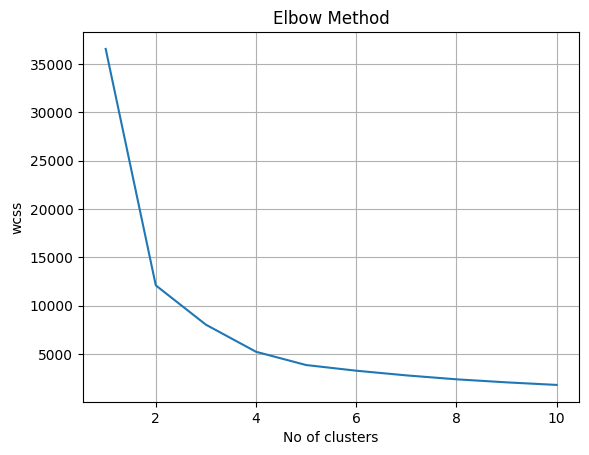

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [ ]:
cluster_labels=km.predict(x)

In [ ]:
cluster_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

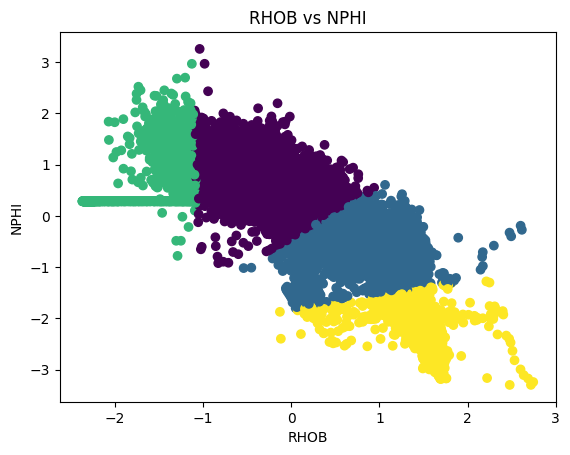

In [ ]:
plt.scatter(x['RHOB'],x['NPHI'],c=cluster_labels)
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB vs NPHI')
plt.show()

In [ ]:
data['Cluster_Labels']=cluster_labels

In [ ]:
cluster_indices=np.where(cluster_labels==0)[0]

In [ ]:
cluster_indices

array([    0,     1,     2, ..., 17857, 18164, 18165])

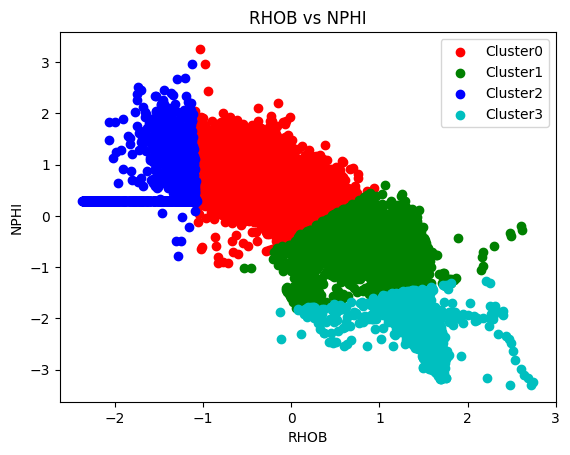

In [ ]:
colors=['r','g','b','c']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('RHOB')
plt.ylabel("NPHI")
plt.title('RHOB vs NPHI')
plt.legend()
plt.show()

In [ ]:
inertia=km.inertia_
print("Inertia = ",inertia)

Inertia =  5226.9651766150255


In [ ]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5595353270468845


In [ ]:
#prediction
def predict_cluster(RHOB,NPHI):
  new_data=[[RHOB,NPHI]]
  cluster=km.predict(new_data)
  return cluster[0]

In [ ]:
#new data
RHOB=-0.7
NPHI=0.28
c=predict_cluster(RHOB,NPHI)
print(f'Cluster :{c}')

Cluster :0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#AGGLOMERATIVE HIERARCHICHAL CLUSTERING

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [ ]:
mergings=linkage(x,method='ward')

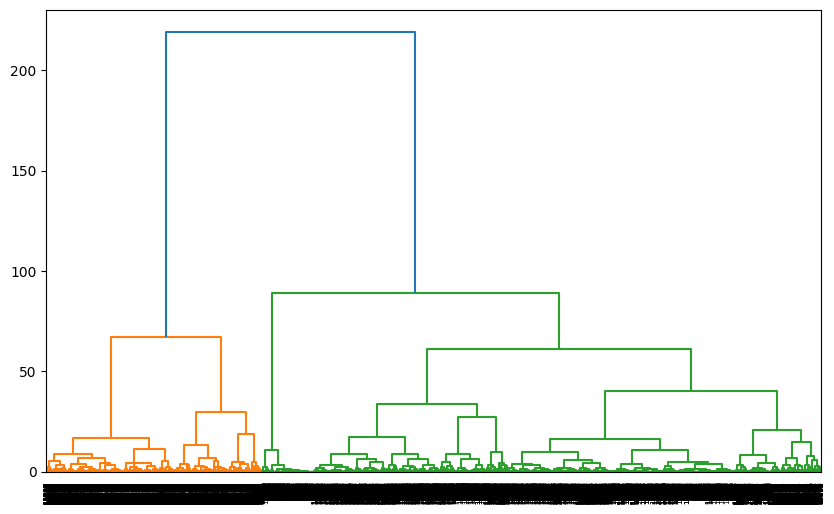

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels=fcluster(mergings,100,criterion='distance')

In [ ]:
cluster_labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

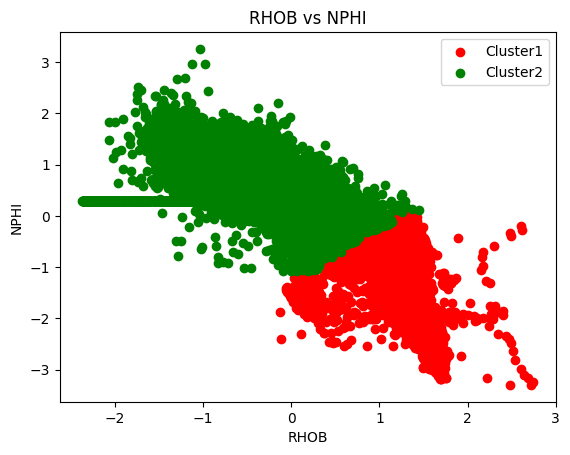

In [ ]:
colors=['r','g','b','c']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('RHOB')
plt.ylabel("NPHI")
plt.title('RHOB vs NPHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.6169823462077547


#WHOLESALE CUSTOMER DATASET

In [ ]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [ ]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols_to_scale = ['Milk', 'Grocery']
data_to_scale = data[cols_to_scale]
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the selected columns
scaled_data = scaler.fit_transform(data_to_scale)
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=data.index)
# Replace the original columns with scaled data
data[cols_to_scale] = scaled_df
print(data)

     Channel  Region  Fresh      Milk   Grocery  Frozen  Detergents_Paper  \
0          2       3  12669  0.523568 -0.041115     214              2674   
1          2       3   7057  0.544458  0.170318    1762              3293   
2          2       3   6353  0.408538 -0.028157    2405              3516   
3          1       3  13265 -0.624020 -0.392977    6404               507   
4          2       3  22615 -0.052396 -0.079356    3915              1777   
..       ...     ...    ...       ...       ...     ...               ...   
435        1       3  29703  0.848446  0.850760   13135               182   
436        1       3  39228 -0.592142 -0.757165    4510                93   
437        2       3  14531  1.314671  2.348386     437             14841   
438        1       3  10290 -0.517536 -0.602514    1038               168   
439        1       3   2787 -0.555924 -0.573227      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3  

In [ ]:
#Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x=data[[ 'Milk', 'Grocery']]

In [ ]:
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_                       #will calculate with in cluster sum of squares
  wcss.append(css)

In [ ]:
wcss

[880.0,
 432.3927714507899,
 274.06159960375555,
 191.37816927315998,
 157.44385176242665,
 133.56607868552703,
 115.48545277266783,
 98.09272190147315,
 85.86056375812504,
 72.21153492416258]

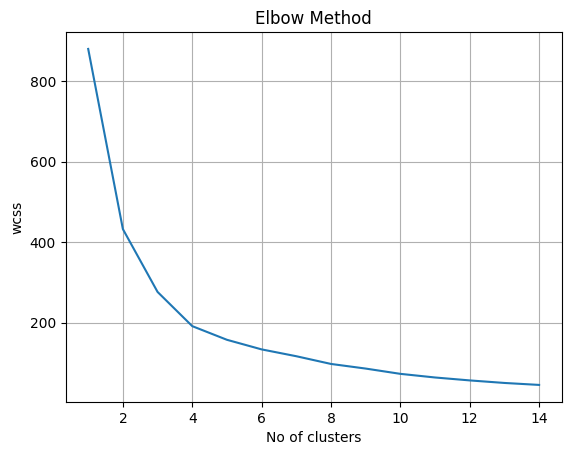

In [ ]:
plt.plot(range(1,15),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [ ]:
cluster_labels=km.predict(x)

In [ ]:
cluster_labels

array([ 2, 12,  2,  8,  0,  0,  0,  2,  0, 12,  2,  8, 12,  2, 12,  8, 12,
        0,  2,  2,  0,  8,  8, 11, 12,  0,  8,  8,  1,  8,  2,  0,  8,  0,
        8,  2,  0, 12, 12,  8,  0,  0, 12,  1,  2,  9,  1,  3,  2,  4,  8,
        0,  0, 12,  8,  0,  4, 12,  8,  2,  0,  3,  0, 12,  8,  4,  0,  2,
        0,  8,  8, 10,  0,  2,  2,  8,  0,  1,  8,  0,  8, 12, 12,  8,  0,
        6, 13,  2,  8,  0,  8,  8,  4,  8, 12,  0,  0,  8,  8,  8,  2, 12,
        2,  2,  8,  8,  2, 12,  2,  1,  8, 12,  8,  8,  8,  8,  8,  0,  8,
        8,  8,  8,  8, 12,  8,  0,  8,  2,  0,  8,  8,  8,  8,  8,  8,  8,
        2,  2,  0,  0,  0,  7,  2,  8,  8,  1,  8,  8,  8,  8,  8,  8,  8,
        0,  8, 12,  2,  8,  2, 12,  2,  8,  8,  1,  2, 12,  2,  8,  8,  8,
       12,  9,  0, 10,  8,  2,  0,  0,  0,  0,  2,  9,  2, 11,  8,  0,  8,
        2,  2, 12,  0,  8,  8, 10,  8,  0,  0,  2,  0,  8,  1,  1, 12,  8,
        8,  1,  8,  0,  0, 12,  8,  4,  8,  0,  2, 12,  1,  8, 12,  8,  8,
        2,  8,  0,  8,  0

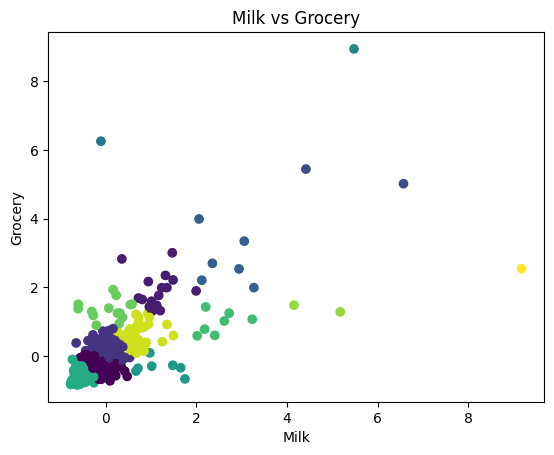

In [ ]:
plt.scatter(x['Milk'],x['Grocery'],c=cluster_labels)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk vs Grocery')
plt.show()

In [ ]:
data['Cluster_Labels']=cluster_labels

In [ ]:
inertia=km.inertia_
print("Inertia = ",inertia)

Inertia =  45.30324656431275


In [ ]:
#prediction
def predict_cluster(Milk,Grocery):
  new_data=[[Milk,Grocery]]
  cluster=km.predict(new_data)
  return cluster[0]

In [ ]:
#AGGLOMERATIVE HIERARCHICHAL CLUSTERING

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [ ]:
mergings=linkage(x,method='ward')

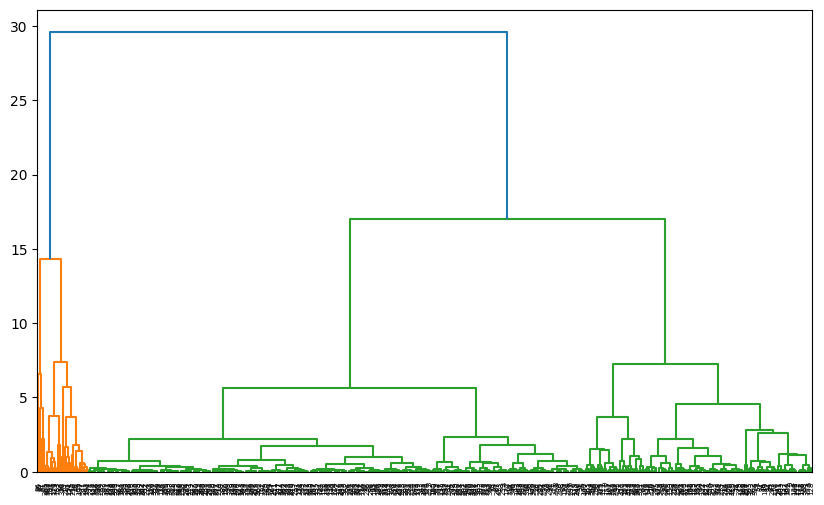

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels=fcluster(mergings,100,criterion='distance')

In [ ]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

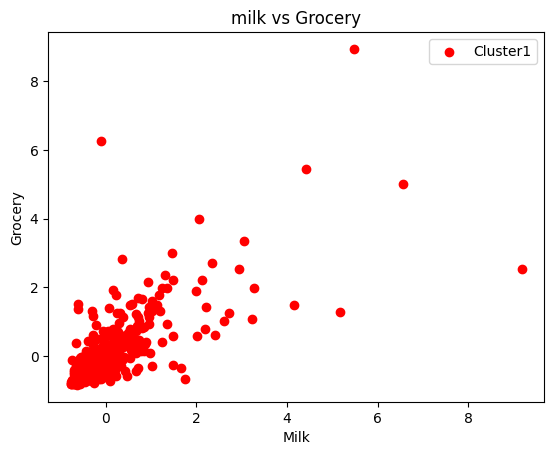

In [ ]:
colors=['r','g','b','c']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Milk'],cluster_data['Grocery'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel("Grocery")
plt.title('milk vs Grocery')
plt.legend()
plt.show()